# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv ("datasets/Spending Score.csv")

df.sample(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
103,104,Male,26,62,55
120,121,Male,27,67,56
132,133,Female,25,72,34


<a id='section_21'></a>
# **1 - Data Wrangling**

## **1.1 - Edit**

In [3]:
df.drop ( ['CustomerID' , 'Genre' ,'Age'] , axis=1 , inplace =True )

df.rename ( columns = { 'Annual Income (k$)':'AI' , 'Spending Score (1-100)':'SS' }  ,  inplace =True) 

df.head(3)

,AI,SS
0,15,39
1,15,81
2,16,6


## **1.2 - Transform**

In [4]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [5]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns =['AI','SS'] )

df.head(3)

,AI,SS
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424


## **1.3 - Feature Selection via PCA**

* Since there are only 2 features , we wont apply PCA here

<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

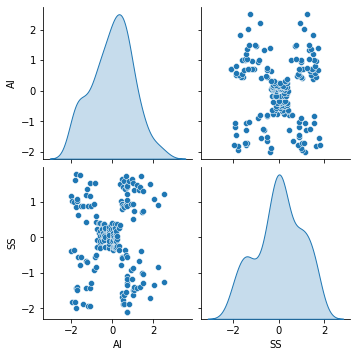

In [6]:
sns.pairplot (df , diag_kind='kde') ;

### **2.1.2 - Elbow Plot**

In [7]:
from sklearn.cluster import KMeans

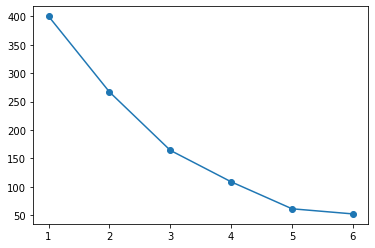

In [8]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [9]:
from   sklearn.metrics   import  silhouette_score

In [10]:
scores =[]

for k in range(2,13):                                                                #  range starts from 2

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels)
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [11]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0)    .head()       .style.hide_index()

k,Avg Silhouette Score
5,0.560539
4,0.498353
6,0.465110
10,0.454742
7,0.453315


### **2.1.4 - Dendrogram**

In [12]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

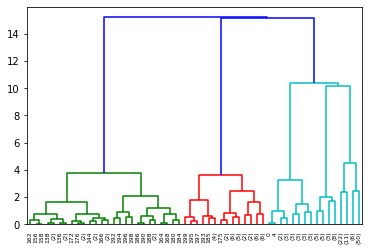

In [13]:
model  =  AgglomerativeClustering  (affinity ='euclidean' ,  linkage ='ward')

model.fit (df)

Z = linkage (df, 'ward')

dendrogram ( Z  ,  p=5  ,  truncate_mode='level')                                               

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 5 |         
| Silhouette | 5 |
| Dendrogram | 5 |

In [14]:
KM    =  KMeans ( n_clusters=5 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [15]:
labels         =  KM.predict(df)                             

df ["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

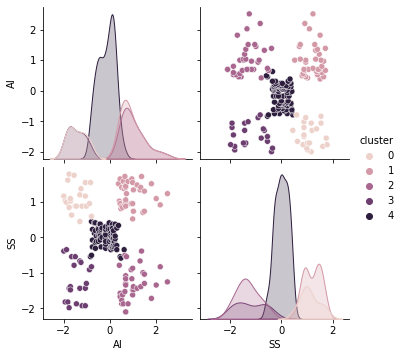

In [16]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster') ;

### **2.4.2 - Boxplot**

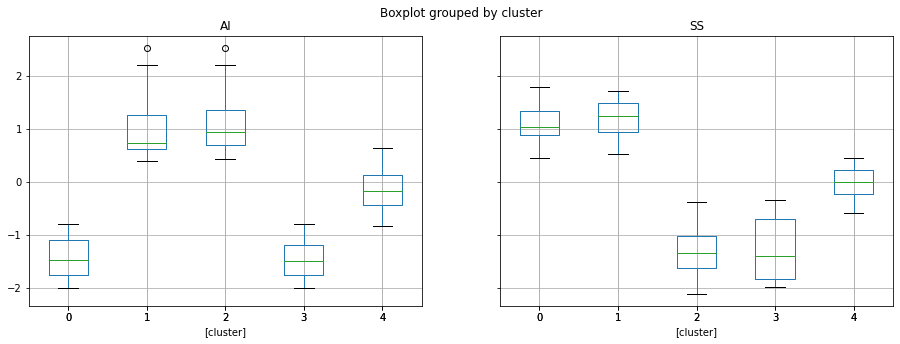

In [17]:
df.boxplot (by='cluster', layout=(1,2) , figsize=(15,5))

plt.show()

### **2.4.3 - Scatterplot**

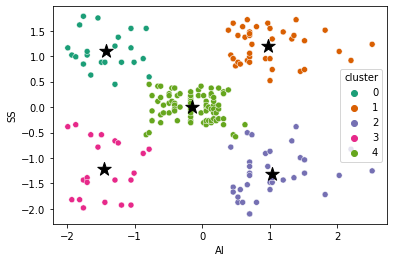

In [18]:
sns.scatterplot ( x='AI'  ,  y='SS'  ,  hue ='cluster' , data=df , palette='Dark2') 

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=200, c='black', marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Signifies |
| ---    | ---    |
| 0 | AI low , SS high  |         
| 1 | AI high , SS high  |
| 2 | AI high , SS low |
| 3 | AI low , SS low |
| 4 | AI avg , SS avg |